# Proyecto 2 - Procesamiento de Imágenes

In [1]:
from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
folder = "/content/drive/MyDrive/Colab Notebooks/2° Cuatri Python/Proyectos/Proyecto 2  -  Manuel Jarque/Imagenes/"

## Ejercicio 1

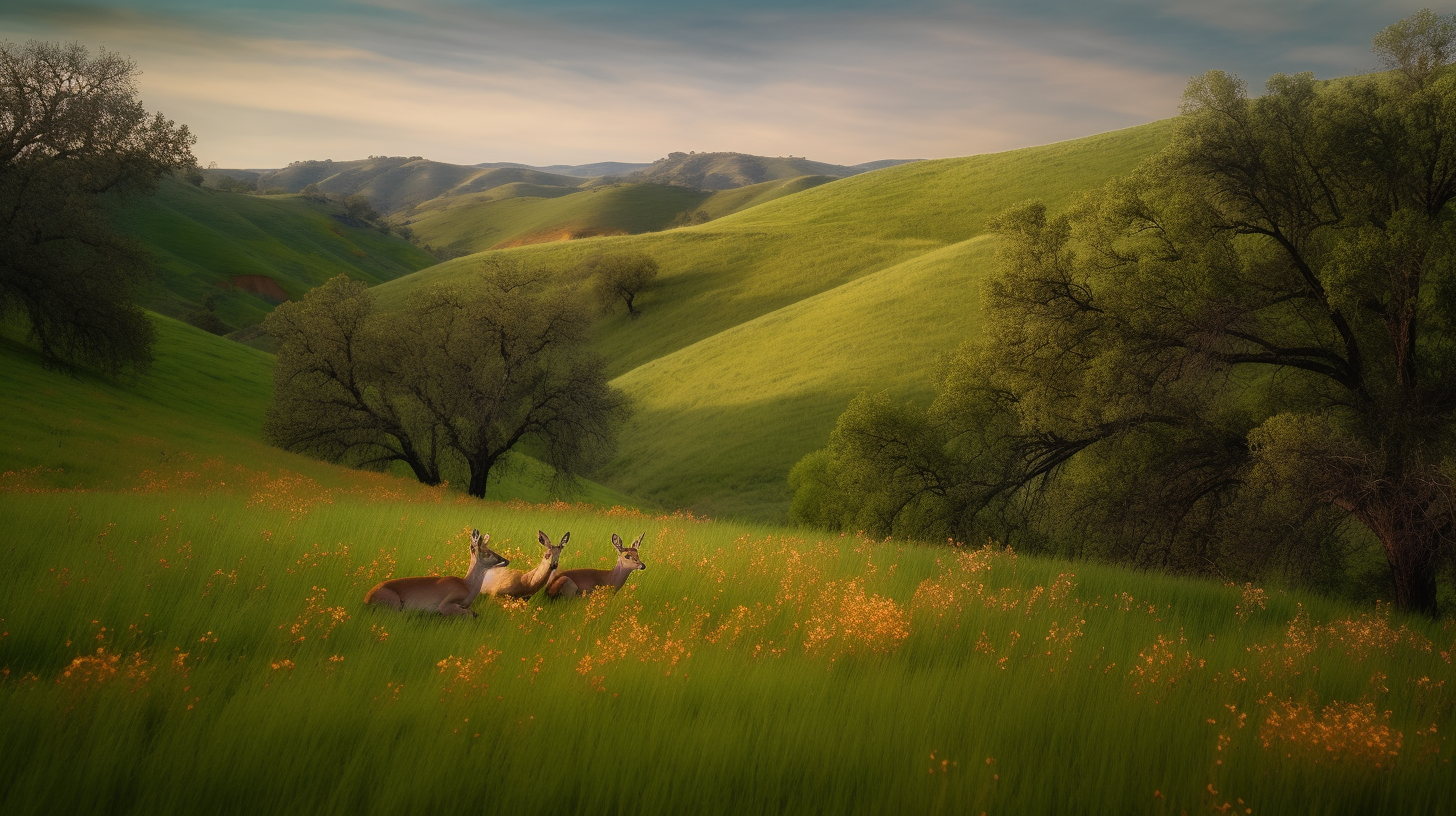

In [3]:
img_fauna = Image.open(folder + "fauna_pastizal.png")
img_fauna

In [4]:
def redimensionar_imagen(ruta, nombre, plataforma):

    # Cargando la imagen
    img = Image.open(ruta + nombre)
    print(f"Dimensiones originales de la imagen: {img.size}")

    # dimensiones recomendadas por plataforma
    plataforma = plataforma.capitalize()
    dimensiones = {
        "Instagram": (1080, 1080),
        "Facebook": (1200, 630),
        "Twitter": (1024, 512),
        "Youtube": (1280, 720)
    }

    if plataforma not in dimensiones:
        print("Plataforma no reconocida. Usa: 'Instagram', 'Facebook', 'Twitter' o 'Youtube'.")
        return img  # Devolver imagen sin cambios si la plataforma es desconocida

    # Obtener dimensiones objetivo
    ancho_objetivo, alto_objetivo = dimensiones[plataforma]

    # Redimensionar manteniendo la relación de aspecto usando img.thumbnail
    img.thumbnail((ancho_objetivo, alto_objetivo))

    nombre_redimensionada = input("Ingrese el nombre para la imagen redimensionada (separando las palabras con _): ")

    print(f"Imagen redimensionada a {img.size} para {plataforma}")
    img.save(ruta + f"{nombre_redimensionada.lower()}_para_{plataforma.lower()}.png")
    print(f"Imagen guardada como '{nombre_redimensionada.lower()}_para_{plataforma.lower()}.png'")

    return img #Devolver la imagen redimensionada


Dimensiones originales de la imagen: (1456, 816)
Ingrese el nombre para la imagen redimensionada (separando las palabras con _): fauna_redimensionada
Imagen redimensionada a (1080, 605) para Instagram
Imagen guardada como 'fauna_redimensionada_para_instagram.png'


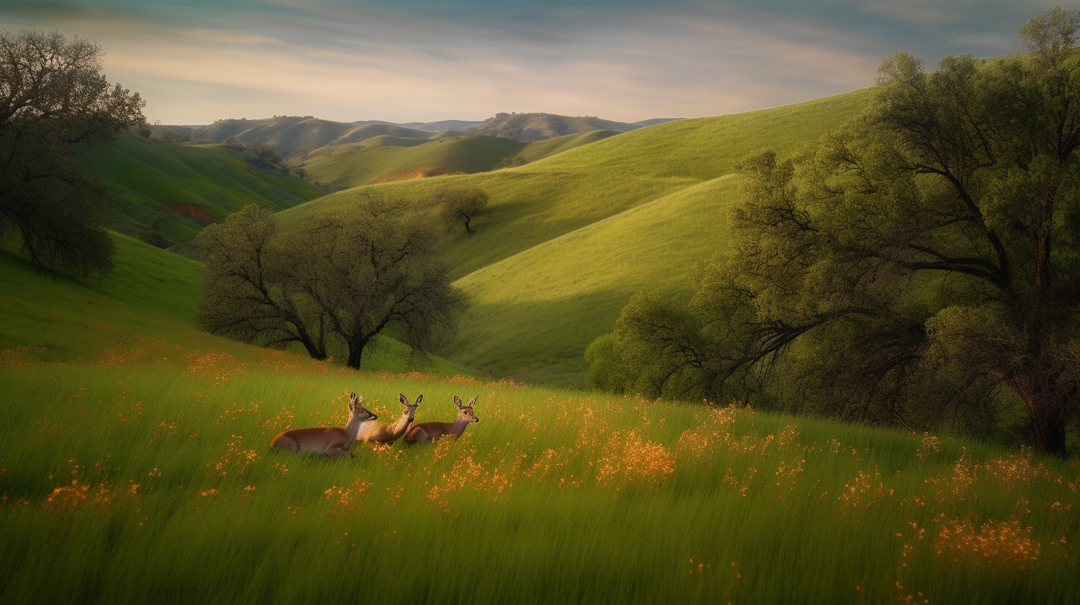

In [5]:
redimensionar_imagen(folder, "fauna_pastizal.png", "Instagram")

## Ejercicio 2

In [6]:
def ajustar_contraste(ruta, nombre):

    #Cargando la imagen y convirtiéndola en un array de números
    img = cv2.imread(ruta + nombre, 0)
    img_np = np.array(img)

    # Calcular histograma y CDF de la imagen original
    hist, bins = np.histogram(img_np.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Graficar imagen original
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.imshow(img_np, cmap='gray')
    plt.title("Imagen original")
    plt.axis("off")

    #Histograma y CDF de la imagen original
    plt.subplot(2, 2, 2)
    plt.plot(cdf_normalized, color='b')
    plt.hist(img_np.flatten(), 256, [0, 256], color='r')
    plt.xlim([0, 256])
    plt.legend(('CDF', 'Histograma'), loc='upper left')
    plt.title("Histograma original")

    # Ecualización del histograma
    equ = cv2.equalizeHist(img_np)

    # Calcular histograma y CDF de la imagen ecualizada
    hist_eq, bins_eq = np.histogram(equ.flatten(), 256, [0, 256])
    cdf_eq = hist_eq.cumsum()
    cdf_eq_normalized = cdf_eq * hist_eq.max() / cdf_eq.max()

    # Graficar imagen ecualizada
    plt.subplot(2, 2, 3)
    plt.imshow(equ, cmap='gray')
    plt.title("Imagen ecualizada")
    plt.axis("off")

    #Histograma y CDF de la imagen ecualizada
    plt.subplot(2, 2, 4)
    plt.plot(cdf_eq_normalized, color='b')
    plt.hist(equ.flatten(), 256, [0, 256], color='r')
    plt.xlim([0, 256])
    plt.legend(('CDF', 'Histograma'), loc='upper left')
    plt.title("Histograma ecualizado")

    #Guardando la imagen
    nombre_ecualizada = input("Ingrese el nombre para la imagen ecualizada (separando las palabras con _): ")
    Image.fromarray(equ).save(ruta + f"{nombre_ecualizada.lower()}_ecualizada.png")
    print(f"Imagen guardada como '{nombre_ecualizada.lower()}_ecualizada.png'")

    #Mostrando la imagen original y la ecualizada
    plt.tight_layout()
    plt.show()

Ingrese el nombre para la imagen ecualizada (separando las palabras con _): oscura
Imagen guardada como 'oscura_ecualizada.png'


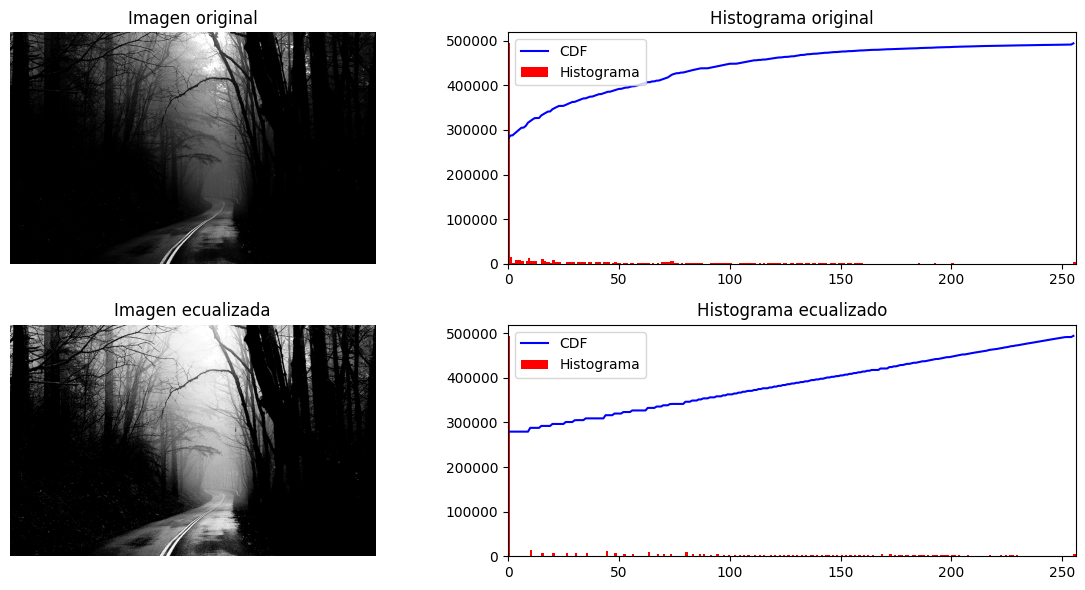

In [7]:
ajustar_contraste(folder, "oscura.png")

## Ejercicio 3

In [8]:
def aplicar_filtro(ruta, nombre, filtro_seleccionado):

    # Cargar la imagen
    img = Image.open(ruta + nombre)

    # Diccionario de filtros disponibles
    filtro_seleccionado = filtro_seleccionado.capitalize()
    filtros = {
        "Blur": ImageFilter.BLUR,
        "Contour": ImageFilter.CONTOUR,
        "Detail": ImageFilter.DETAIL,
        "Edge Enhance": ImageFilter.EDGE_ENHANCE,
        "Edge Enhance More": ImageFilter.EDGE_ENHANCE_MORE,
        "Emboss": ImageFilter.EMBOSS,
        "Find Edges": ImageFilter.FIND_EDGES,
        "Sharpen": ImageFilter.SHARPEN,
        "Smooth": ImageFilter.SMOOTH
    }

    # Comprobar si el filtro seleccionado es válido
    if filtro_seleccionado not in filtros:
        print("Filtro no válido. Elige uno de los siguientes:")
        for nombre in filtros:
            print(f"- {nombre}")
        return

    # Aplicar el filtro seleccionado y guardar la imagen resultante
    img_filtro_seleccionado = img.filter(filtros[filtro_seleccionado])
    nombre_filtrada = input("Ingrese el nombre para la imagen con filtro (separando las palabras con _): ")
    img_filtro_seleccionado.save(ruta + f"{nombre_filtrada.lower()}_con_filtro_{filtro_seleccionado.lower()}.png")
    print(f"Imagen con filtro '{filtro_seleccionado.lower()}' guardada como '{nombre_filtrada.lower()}_con_filtro_{filtro_seleccionado.lower()}.png'.")

    # Crear una figura para mostrar la imagen original y todas las imágenes con filtros
    plt.figure(figsize=(15, 8))

    # Mostrar imagen original
    plt.subplot(3, 4, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    # Mostrar todas las imágenes con filtros
    for i, (nombre_filtro, filtro) in enumerate(filtros.items(), start=2):
        img_filtrada = img.filter(filtro)
        plt.subplot(3, 4, i)
        plt.imshow(img_filtrada)
        plt.title(nombre_filtro, color='red' if nombre_filtro == filtro_seleccionado else 'black')
        plt.axis("off")

    plt.savefig(ruta + f"{nombre_filtrada.lower()}_todos_los_filtros.png")
    print(f"Imagen con todos los filtros guardada como '{nombre_filtrada.lower()}_todos_los_filtros.png'.")

    # guardado de la figura con todos los filtros
    plt.tight_layout()
    plt.show()

Ingrese el nombre para la imagen con filtro (separando las palabras con _): bsas
Imagen con filtro 'blur' guardada como 'bsas_con_filtro_blur.png'.
Imagen con todos los filtros guardada como 'bsas_todos_los_filtros.png'.


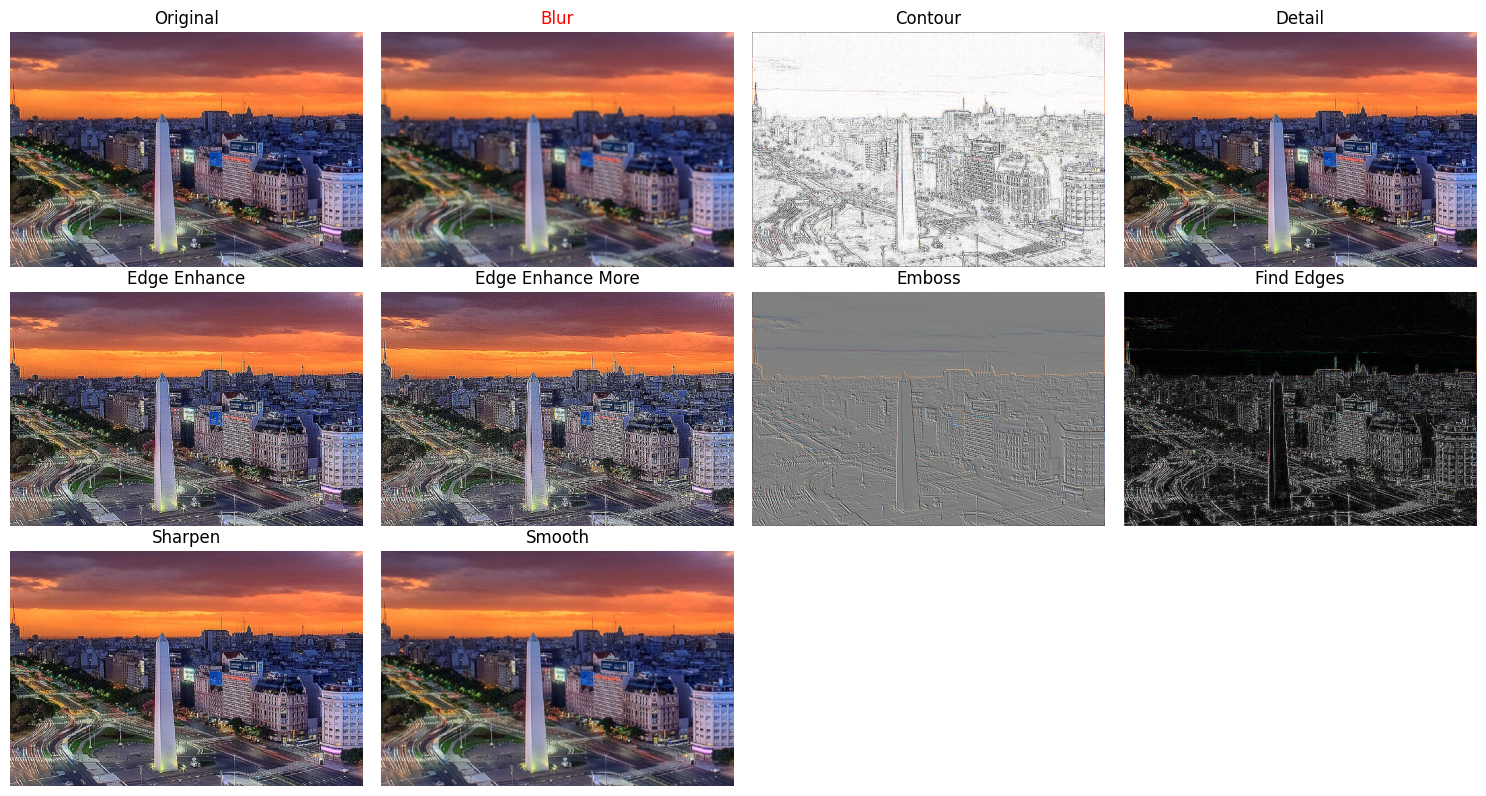

In [9]:
aplicar_filtro(folder, "bsas_original.png", "Blur")

## Ejercicio 4

In [10]:
def crear_boceto(ruta, nombre, persona = True):
    if not persona:
        print("La imagen no es de una persona. No se aplicará el efecto de boceto.")
        return

    # Cargar la imagen en escala de grises
    img = Image.open(ruta + nombre).convert("L")

    # Suavizar la imagen para reducir ruido
    img_suavizada = img.filter(ImageFilter.GaussianBlur(radius= 1.7))

    # Aplicar filtro de detección de bordes
    img_bordes = img_suavizada.filter(ImageFilter.FIND_EDGES)

    # Realzar la nitidez para que los bordes se destaquen
    img_realzada =ImageEnhance.Sharpness(img_bordes).enhance(3.0)

    # Aumentar contraste para intensificar aún más los bordes
    img_realzada = ImageEnhance.Contrast(img_realzada).enhance(2.5)
    # Mostrar imagen original y boceto final
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_realzada, cmap='gray')
    plt.title("Boceto con bordes realzados")
    plt.axis("off")

    # Guardar el boceto final
    nombre_boceto = input("Ingrese el nombre para el boceto (separando las palabras con _): ")
    img_realzada.save(ruta + f"{nombre_boceto.lower()}_realzado.png")
    print(f"Imagen de boceto guardada como '{nombre_boceto.lower()}_realzado.png'.")

    #Mostrando la imagen original y el boceto
    plt.tight_layout()
    plt.show()

Ingrese el nombre para el boceto (separando las palabras con _): dibujo_messi
Imagen de boceto guardada como 'dibujo_messi_realzado.png'.


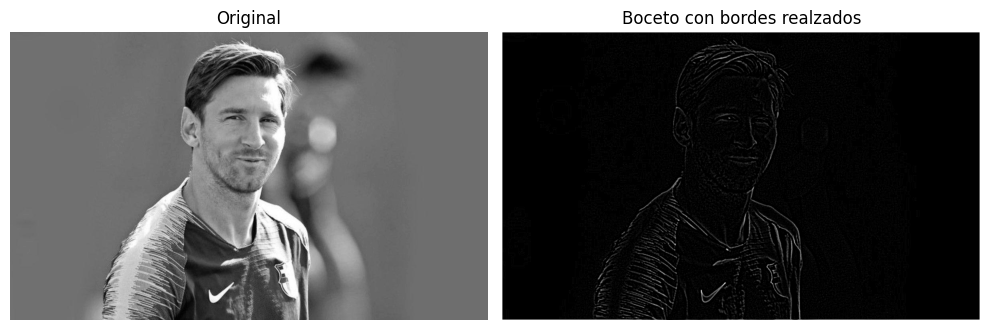

In [11]:
crear_boceto(folder, "messi.png")

Esta función es ideal para pintores y dibujantes porque resalta claramente todos los bordes principales del sujeto, generando un boceto que sirve como base para el dibujo sin los inconvenientes de la binarización, que suele limitarse a contornos apenas visibles y demasiado básicos. Al mejorar la nitidez y contraste de los bordes, permite que los artistas obtengan una referencia detallada y precisa de los rasgos de la persona, ofreciendo una imagen clara que facilita un boceto más realista y cercano al original.

Además, esta herramienta les permite adaptar su trabajo según el nivel de detalle que prefieran. Con un boceto de esta calidad, los usuarios pueden enfocarse en los elementos que les interesen, manteniendo la estructura y proporciones de la imagen de forma más fiel.

## Ejercicio 5

In [15]:
imagen_redimensionada = None

def menu():
    global imagen_redimensionada

    while True:
        print("\n--- Menú de Opciones ---")
        print("1. Redimensionar imagen\n2. Ajustar contraste\n3. Aplicar filtro\n4. Crear boceto\n5. Salir\n")

        try:
            opcion = int(input("Seleccione una opción: "))

            if opcion == 1:
                # Redimensionar imagen
                nombre = input("Ingrese el nombre de la imagen (con extensión de archivo): ")
                plataforma = input("Ingrese la plataforma (Instagram, Facebook, Twitter, Youtube): ")
                imagen_redimensionada = redimensionar_imagen(folder, nombre, plataforma)

            elif opcion in [2, 3, 4]:
                # Verificar que la imagen fue redimensionada
                if imagen_redimensionada is None:
                    print("Primero debes redimensionar la imagen usando la opción 1.")
                    continue

                if opcion == 2:
                    ajustar_contraste(folder, nombre)
                elif opcion == 3:
                    filtro = input("Ingrese el filtro a aplicar (Blur, Contour, Detail, Edge Enhance, Emboss, Find Edges, Sharpen): ")
                    aplicar_filtro(folder, nombre, filtro)
                elif opcion == 4:
                    crear_boceto(folder, nombre)


            elif opcion == 5:
                print("Saliendo del programa.")
                break
            else:
                print("Opción no válida, por favor intente de nuevo.")

        except ValueError:
            print("Error: por favor ingrese un número para seleccionar una opción.")
        except Exception as ex:
            print(f"Error: {ex}")

In [ ]:
menu()